/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8743 - loss: 0.4355
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9648 - loss: 0.1196
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9776 - loss: 0.0761
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9823 - loss: 0.0573
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9876 - loss: 0.0413
313/313 - 1s - 2ms/step - accuracy: 0.9730 - loss: 0.0871
Test accuracy: 0.9730
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


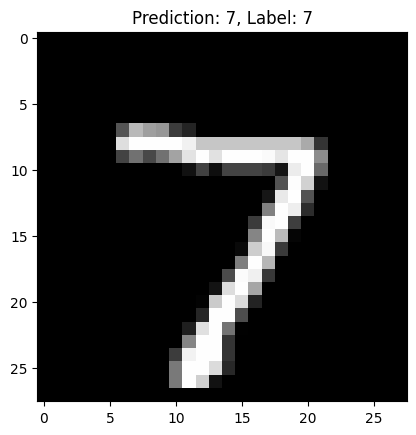

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data (optional, but recommended for image classification)
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to add a channel dimension (required for Keras models)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define and compile the model (using Keras Sequential API)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer (feel free to experiment with parameters)
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units (one for each digit)
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)  # Adjust epochs and batch size as needed

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

# Make a prediction
prediction = model.predict(x_test[:1])  # Get prediction for the first test image
predicted_class = np.argmax(prediction[0])

# Display the image and predicted label
if predicted_class == y_test[0]:
    import matplotlib.pyplot as plt
    plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
    plt.title(f'Prediction: {predicted_class}, Label: {y_test[0]}')
    plt.show()
else:
    print(f"Prediction ({predicted_class}) doesn't match label ({y_test[0]})")